In [1]:
# importing packages
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
# loading train dataset
train = pd.read_csv(r'D:\Purity\Hackathon\Britgit\vid popularity\VidChallenge Dataset\Dataset\Metadata\train_meta_df.csv')
# train shape
print(train.shape)
# checking for duplicates
print(train.comp_id.unique().shape)
# dataframe
train.head()

(3000, 14)
(3000,)


,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,False,True,1.77778,86,3,True,False,0,290,3,0,5,6
1,2,False,True,1.33333,1129,2,True,False,0,1443,0,2,5,6
2,3,False,True,1.76667,1163,2,True,False,0,329,0,1,5,6
3,4,False,True,1.77778,1326,2,True,False,0,63,0,3,5,6
4,5,False,True,1.77273,2612,2,True,False,3,37,0,0,5,6


In [3]:
# loading test dataset
test = pd.read_csv(r'D:\Purity\Hackathon\Britgit\vid popularity\VidChallenge Dataset\Dataset\Metadata\public_meta_df.csv')
# test shape
print(test.shape)
# checking duplicates
print(test.comp_id.unique().shape)
# dataframe
test.head()

(986, 13)
(986,)


,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,False,True,1.33333,1675,2,False,False,0,10,2,2,3
1,3002,False,True,1.33333,1479,2,False,False,0,10,2,2,3
2,3003,False,True,1.33333,1505,2,False,False,0,10,2,2,3
3,3004,False,True,1.77778,50,2,True,True,1,6,5,2,3
4,3005,False,True,1.33333,1543,2,False,False,0,6,2,2,3


In [4]:
# merging train and test dataset for preprocessing
frames = [train,test]
df = pd.concat(frames, keys=['x', 'y'])

df

comp_id  ad_blocked  embed    ratio  duration  language  partner  \
x 0          1       False   True  1.77778        86         3     True   
  1          2       False   True  1.33333      1129         2     True   
  2          3       False   True  1.76667      1163         2     True   
  3          4       False   True  1.77778      1326         2     True   
  4          5       False   True  1.77273      2612         2     True   
...        ...         ...    ...      ...       ...       ...      ...   
y 981     3982       False   True  1.77778        46         3     True   
  982     3983       False   True  1.33333        91         2    False   
  983     3984       False   True  1.77778        72         3     True   
  984     3985       False   True  1.33333        82         7    False   
  985     3986       False   True  1.34091        88         2    False   

       partner_active  n_likes   views  n_tags  n_formats  dayofweek  hour  
x 0             False        0   290.0       3          0          5     6  
  1             False        0  1443.0       0          2          5     6  
  2             False        0   329.0       0          1          5     6  
  3             False        0    63.0       0          3          5     6  
  4             False        3    37.0       0          0          5     6  
...               ...      ...     ...     ...        ...        ...   ...  
y 981            True        0     NaN       2          4          6    13  
  982           False        0     NaN       1          2          6    13  
  983            True        0     NaN       2          4          6    13  
  984           False        0     NaN       9          3          6    13  
  985           False        0     NaN       4          3          6    13  

[3986 rows x 14 columns]

In [5]:
# getting variable types
df.dtypes

comp_id             int64
ad_blocked           bool
embed                bool
ratio             float64
duration            int64
language            int64
partner              bool
partner_active       bool
n_likes             int64
views             float64
n_tags              int64
n_formats           int64
dayofweek           int64
hour                int64
dtype: object

In [6]:
# dropping id column
df.drop(['comp_id'], axis=1, inplace=True)
print(df.shape)
df.head()

(3986, 13)


ad_blocked  embed    ratio  duration  language  partner  partner_active  \
x 0       False   True  1.77778        86         3     True           False   
  1       False   True  1.33333      1129         2     True           False   
  2       False   True  1.76667      1163         2     True           False   
  3       False   True  1.77778      1326         2     True           False   
  4       False   True  1.77273      2612         2     True           False   

     n_likes   views  n_tags  n_formats  dayofweek  hour  
x 0        0   290.0       3          0          5     6  
  1        0  1443.0       0          2          5     6  
  2        0   329.0       0          1          5     6  
  3        0    63.0       0          3          5     6  
  4        3    37.0       0          0          5     6

In [7]:
# changing columns to categorical types
cat_cols = ['ad_blocked', 'embed', 'language', 'partner', 'partner_active', 'dayofweek', 'hour',
            'n_likes', 'n_tags', 'n_formats']
for col in cat_cols:
    df[col] = df[col].astype('category')
df.dtypes

ad_blocked        category
embed             category
ratio              float64
duration             int64
language          category
partner           category
partner_active    category
n_likes           category
views              float64
n_tags            category
n_formats         category
dayofweek         category
hour              category
dtype: object

In [8]:
# getting statistical info
df.describe()

,ratio,duration,views
count,3986.000000,3986.000000,3000.000000
mean,1.640004,552.998495,548.708333
std,0.293508,970.390715,1212.155134
min,0.550000,0.000000,20.000000
25%,1.333330,65.000000,58.000000
50%,1.777780,161.000000,128.000000
75%,1.777780,508.750000,348.000000
max,3.200000,20068.000000,9545.000000


In [9]:
cat_cols = ['ad_blocked', 'embed', 'language', 'partner', 'partner_active', 'dayofweek', 'hour',
            'n_likes', 'n_tags', 'n_formats']

In [10]:
# checking for missing values
df.isna().sum()

ad_blocked          0
embed               0
ratio               0
duration            0
language            0
partner             0
partner_active      0
n_likes             0
views             986
n_tags              0
n_formats           0
dayofweek           0
hour                0
dtype: int64

In [11]:
# getting value counts for each categorical column
def count_value(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
count_value(df, cat_cols)


For column ad_blocked
False    3966
True       20
Name: ad_blocked, dtype: int64

For column embed
True     3934
False      52
Name: embed, dtype: int64

For column language
2     2955
4      444
3      140
9      116
5      106
6       66
7       53
10      44
1       33
8       29
Name: language, dtype: int64

For column partner
True     2043
False    1943
Name: partner, dtype: int64

For column partner_active
False    3159
True      827
Name: partner_active, dtype: int64

For column dayofweek
7    942
2    874
1    738
3    391
4    387
6    379
5    275
Name: dayofweek, dtype: int64

For column hour
5     778
6     453
1     249
0     208
3     196
4     192
18    182
22    171
2     167
19    164
17    148
23    142
21    134
20    125
13     88
7      86
14     84
15     80
16     72
9      65
10     63
12     61
11     58
8      20
Name: hour, dtype: int64

For column n_likes
0     3677
1      186
2       59
3       22
4       16
6       10
5        5
20       2
16       2
8   

In [12]:
# creating a train dataframe from df for visualization
X = df.loc['x'].copy()

In [13]:
count_value(X, cat_cols)


For column ad_blocked
False    2980
True       20
Name: ad_blocked, dtype: int64

For column embed
True     2982
False      18
Name: embed, dtype: int64

For column language
2     2136
4      419
9      114
5       87
6       66
3       42
7       41
10      36
1       32
8       27
Name: language, dtype: int64

For column partner
True     1806
False    1194
Name: partner, dtype: int64

For column partner_active
False    2317
True      683
Name: partner_active, dtype: int64

For column dayofweek
7    827
2    796
3    391
4    387
1    324
5    275
6      0
Name: dayofweek, dtype: int64

For column hour
5     748
6     423
4     182
0     181
1     180
3     172
2     132
22    104
23    102
18     96
19     79
21     79
17     74
20     65
7      62
12     49
13     44
11     39
14     37
15     36
9      35
16     35
10     30
8      16
Name: hour, dtype: int64

For column n_likes
0     2756
1      139
2       47
3       17
4       16
6        9
5        5
20       2
16       2
8   

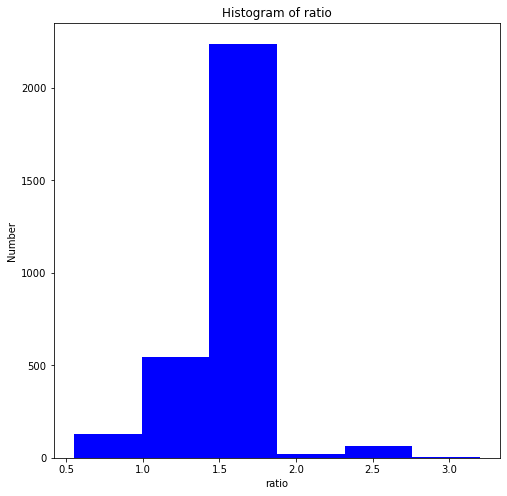

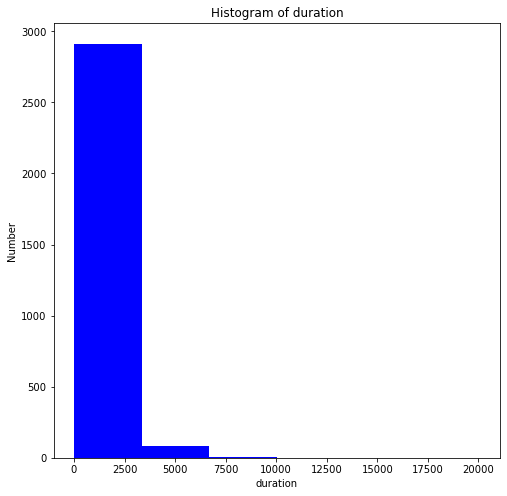

In [14]:
# plotting a histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
num_cols = ['ratio', 'duration']
plot_histogram(X, num_cols)

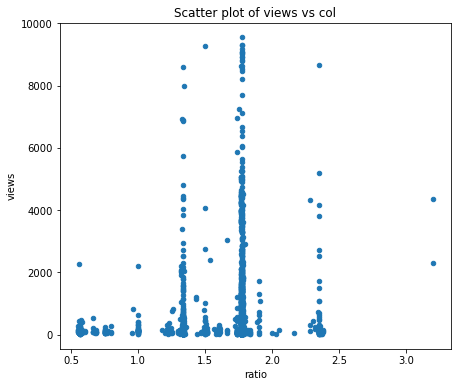

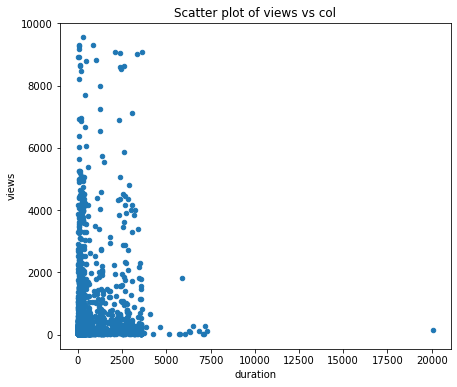

In [15]:
# creating a scatter plot for numerical columns
def scatter_plot(df, cols, col_y):
    for col in cols:
        fig = plt.figure(figsize = (7,6))
        ax = fig.gca()
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs ' + 'col')
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()
scatter_plot(X, num_cols, 'views')

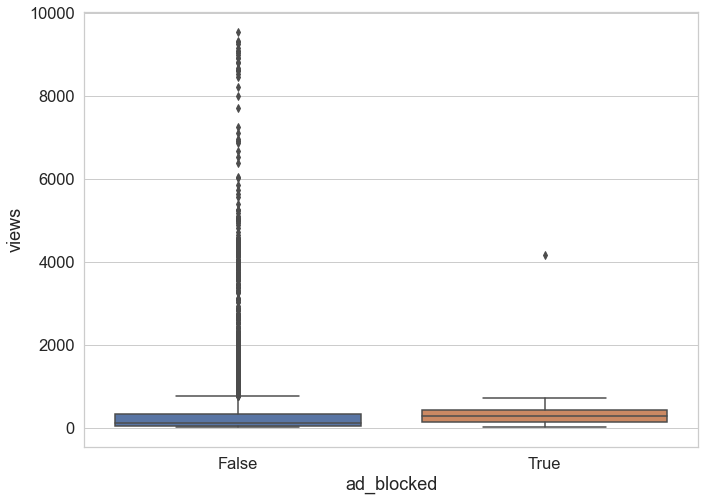

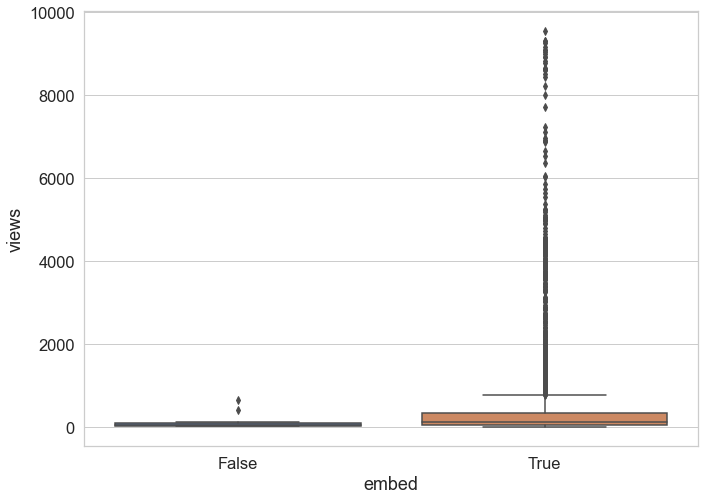

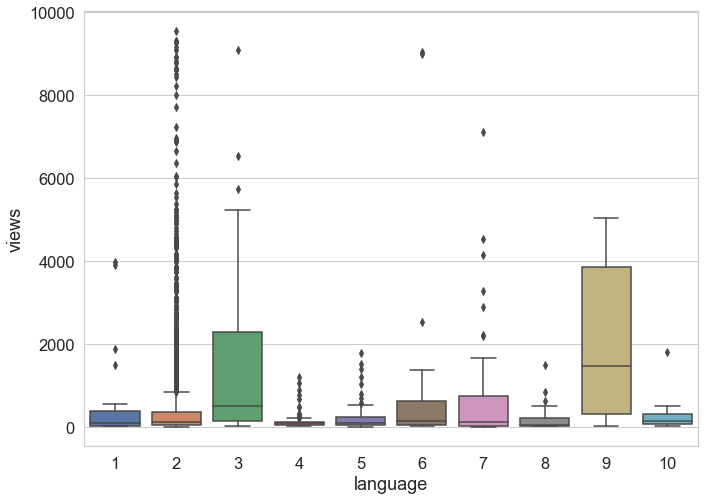

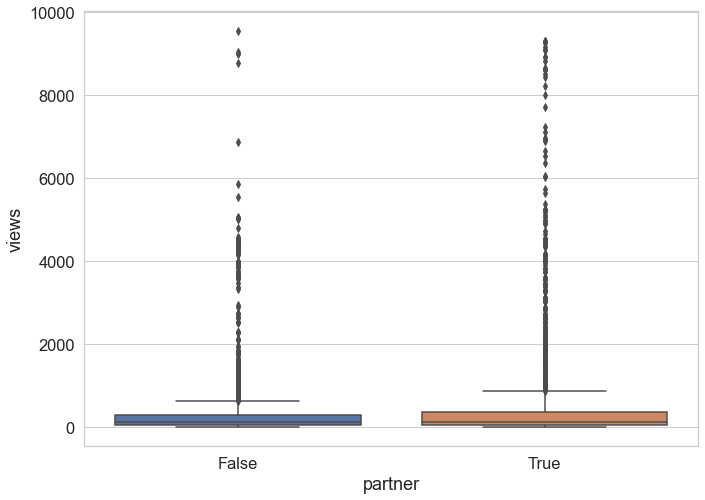

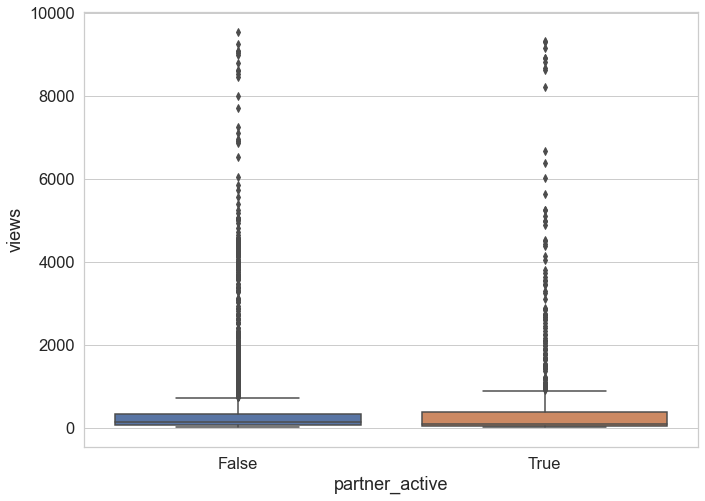

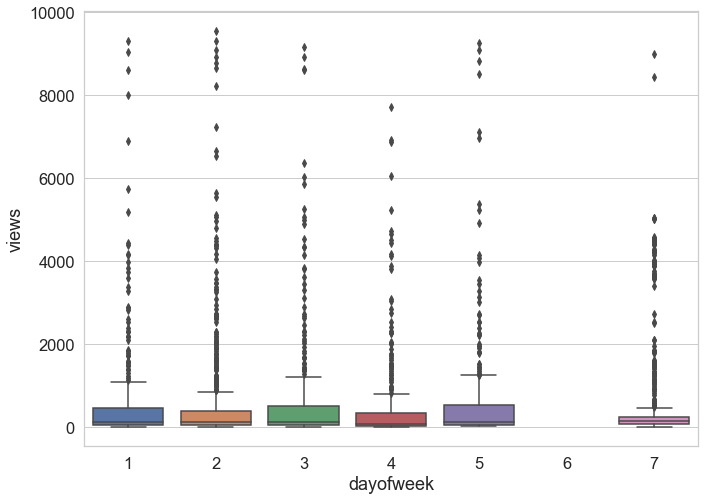

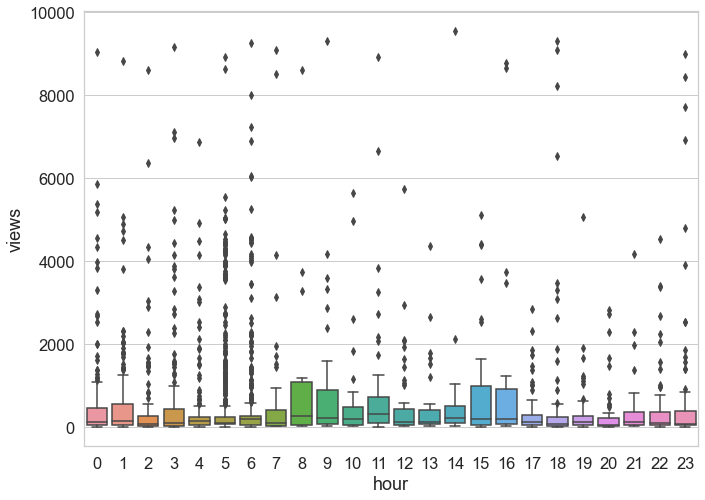

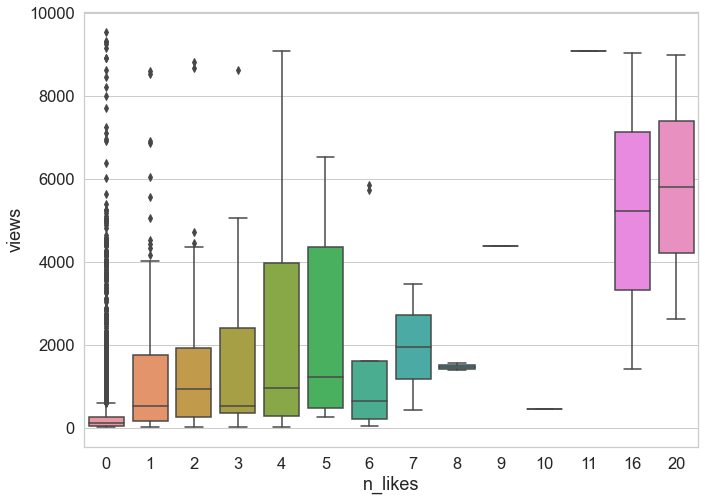

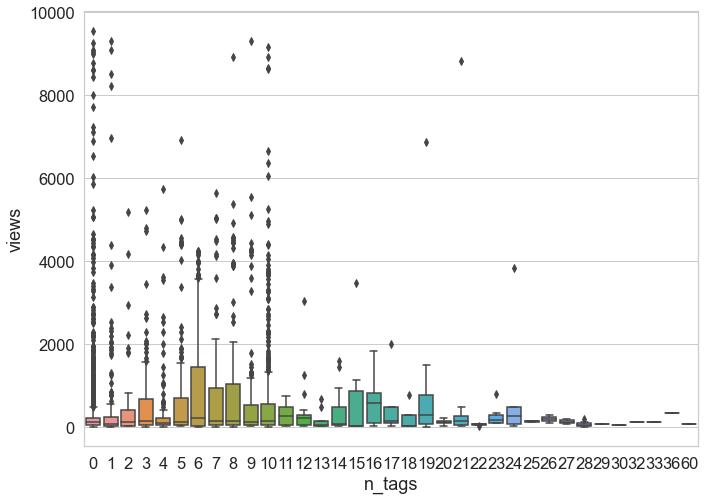

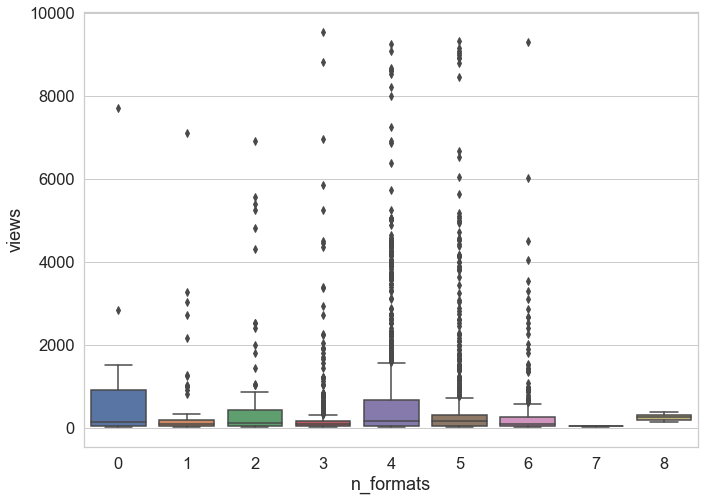

In [16]:
# relationship between categorical values and the label
def box_plot(df, cols, col_y):
    for col in cols:
        sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
        sns.boxplot(x = col, y = col_y, data = df)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
box_plot(X, cat_cols, 'views')

In [17]:
# list of values of 'n_likes' column 
nlike_list = df['n_likes'].tolist()
# creating an empty dict
nlike_category = {}
# aggregating categorical n_likes values
for like in nlike_list:
    if like == 0:
        nlike_category[like] = 'zero'
    else:
        nlike_category[like] = 'abv_zero'
    
print(nlike_category)
# aggregating categorical n_likes values
df['n_likes'] =[nlike_category[x] for x in df['n_likes']]
df['n_likes'].value_counts()        

{0: 'zero', 3: 'abv_zero', 1: 'abv_zero', 4: 'abv_zero', 2: 'abv_zero', 7: 'abv_zero', 5: 'abv_zero', 6: 'abv_zero', 10: 'abv_zero', 9: 'abv_zero', 8: 'abv_zero', 16: 'abv_zero', 20: 'abv_zero', 11: 'abv_zero'}


zero        3677
abv_zero     309
Name: n_likes, dtype: int64

In [18]:
# list of values of 'language' column 
language_list = df['language'].tolist()
# creating an empty dict
language_category = {}
# aggregating categorical n_likes values
for language in language_list:
    if language == 1 or language == 2 or language == 6 or language == 7 or language == 10:
        language_category[language] = 'grp 1'
    elif language == 4 or language == 5 or language == 8:
        language_category[language] = 'grp 2'
    else:
        language_category[language] = 'grp 3'
    
print(language_category)
# aggregating categorical n_likes values
df['language'] =[language_category[x] for x in df['language']]
df['language'].value_counts() 

{3: 'grp 3', 2: 'grp 1', 5: 'grp 2', 7: 'grp 1', 9: 'grp 3', 8: 'grp 2', 4: 'grp 2', 10: 'grp 1', 1: 'grp 1', 6: 'grp 1'}


grp 1    3151
grp 2     579
grp 3     256
Name: language, dtype: int64

In [19]:
# list of values of 'hour' column 
hour_list = df['hour'].tolist()
# creating an empty dict
hour_category = {}
# aggregating categorical n_likes values
for hour in hour_list:
    if hour == 4 or hour == 6 or hour == 8 or hour == 9 or hour == 10 or hour == 11 or hour == 14 or hour == 15 or hour == 16:
        hour_category[hour] = 'hr 1'
    else:
        hour_category[hour] = 'hr 2'
    
print(hour_category)
# aggregating categorical n_likes values
df['hour'] =[hour_category[x] for x in df['hour']]
df['hour'].value_counts()

{6: 'hr 1', 5: 'hr 2', 4: 'hr 1', 3: 'hr 2', 2: 'hr 2', 1: 'hr 2', 0: 'hr 2', 23: 'hr 2', 7: 'hr 2', 22: 'hr 2', 21: 'hr 2', 20: 'hr 2', 19: 'hr 2', 17: 'hr 2', 16: 'hr 1', 15: 'hr 1', 14: 'hr 1', 13: 'hr 2', 12: 'hr 2', 11: 'hr 1', 10: 'hr 1', 9: 'hr 1', 8: 'hr 1', 18: 'hr 2'}


hr 2    2899
hr 1    1087
Name: hour, dtype: int64

In [20]:
# list of values of 'n_tags' column 
ntags_list = df['n_tags'].tolist()
# creating an empty dict
ntags_category = {}
# aggregating categorical n_likes values
for tags in ntags_list:
    if tags == 6 or tags == 11 or tags == 12 or tags == 16 or tags == 19 or tags == 24 or tags == 26 or tags == 36:
        ntags_category[tags] = 'tag 1'
    else:
        ntags_category[tags] = 'tag 2'
    
print(ntags_category)
# aggregating categorical n_likes values
df['n_tags'] =[ntags_category[x] for x in df['n_tags']]
df['n_tags'].value_counts()

{3: 'tag 2', 0: 'tag 2', 2: 'tag 2', 4: 'tag 2', 10: 'tag 2', 5: 'tag 2', 8: 'tag 2', 9: 'tag 2', 6: 'tag 1', 1: 'tag 2', 7: 'tag 2', 19: 'tag 1', 21: 'tag 2', 11: 'tag 1', 24: 'tag 1', 16: 'tag 1', 12: 'tag 1', 13: 'tag 2', 15: 'tag 2', 14: 'tag 2', 20: 'tag 2', 25: 'tag 2', 32: 'tag 2', 28: 'tag 2', 22: 'tag 2', 33: 'tag 2', 18: 'tag 2', 23: 'tag 2', 17: 'tag 2', 27: 'tag 2', 30: 'tag 2', 26: 'tag 1', 60: 'tag 2', 29: 'tag 2', 36: 'tag 1'}


tag 2    3762
tag 1     224
Name: n_tags, dtype: int64

In [21]:
# list of values of 'n_formats' column 
nformats_list = df['n_formats'].tolist()
# creating an empty dict
nformats_category = {}
# aggregating categorical n_likes values
for formats in nformats_list:
    if formats == 4 or formats == 5 or formats == 8 or formats == 0 or formats == 2:
        nformats_category[formats] = 'grp 1'
    else:
        nformats_category[formats] = 'grp 2'
    
print(nformats_category)
# aggregating categorical n_likes values
df['n_formats'] =[nformats_category[x] for x in df['n_formats']]
df['n_formats'].value_counts()  

{0: 'grp 1', 2: 'grp 1', 1: 'grp 2', 3: 'grp 2', 5: 'grp 1', 4: 'grp 1', 6: 'grp 2', 8: 'grp 1', 7: 'grp 2'}


grp 1    2643
grp 2    1343
Name: n_formats, dtype: int64

In [22]:
# list of values of 'dayofweek' column 
dayofweek_list = df['dayofweek'].tolist()
# creating an empty dict
dayofweek_category = {}
# aggregating categorical n_likes values
for dayofweek in dayofweek_list:
    if dayofweek == 6 or dayofweek == 7:
        dayofweek_category[dayofweek] = 'weekend'
    else:
        dayofweek_category[dayofweek] = 'weekday'
    
print(dayofweek_category)
# aggregating categorical n_likes values
df['dayofweek'] =[dayofweek_category[x] for x in df['dayofweek']]
df['dayofweek'].value_counts() 

{5: 'weekday', 4: 'weekday', 7: 'weekend', 1: 'weekday', 2: 'weekday', 3: 'weekday', 6: 'weekend'}


weekday    2665
weekend    1321
Name: dayofweek, dtype: int64

In [23]:
# creating a train dataframe from df for visualization
X = df.loc['x'].copy()
X.head()

,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,False,True,1.77778,86,grp 3,True,False,zero,290.0,tag 2,grp 1,weekday,hr 1
1,False,True,1.33333,1129,grp 1,True,False,zero,1443.0,tag 2,grp 1,weekday,hr 1
2,False,True,1.76667,1163,grp 1,True,False,zero,329.0,tag 2,grp 2,weekday,hr 1
3,False,True,1.77778,1326,grp 1,True,False,zero,63.0,tag 2,grp 2,weekday,hr 1
4,False,True,1.77273,2612,grp 1,True,False,abv_zero,37.0,tag 2,grp 1,weekday,hr 1


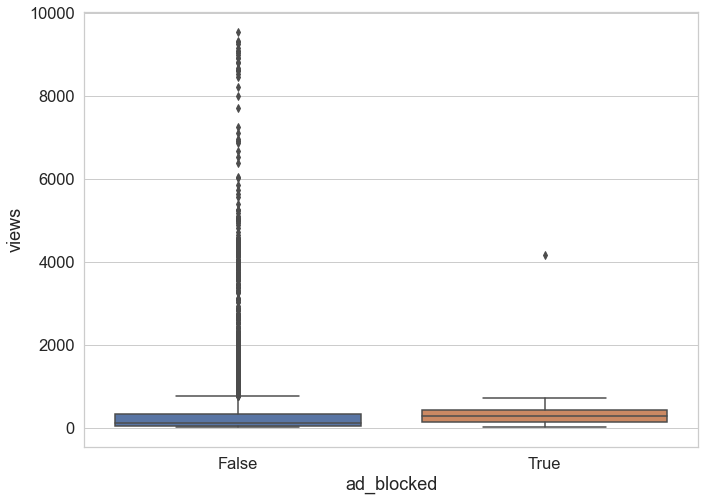

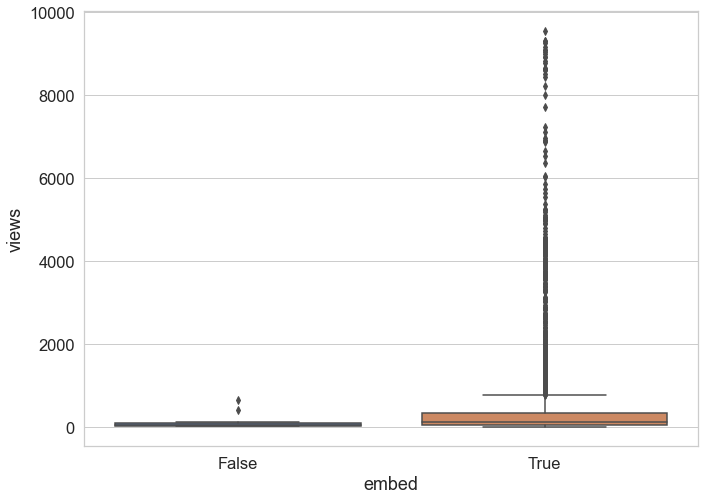

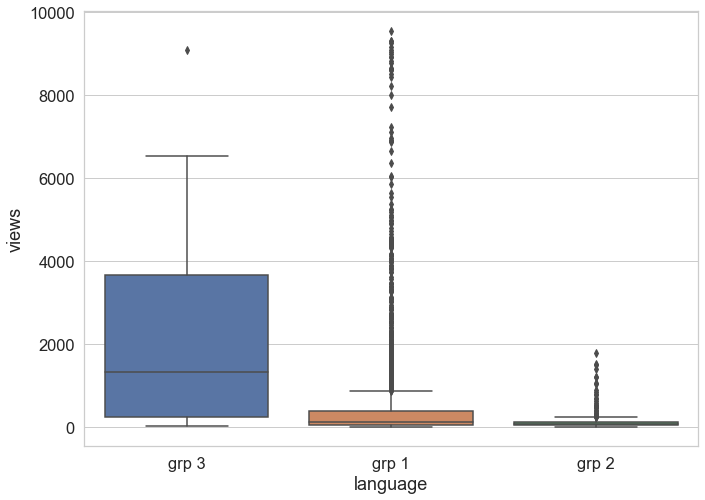

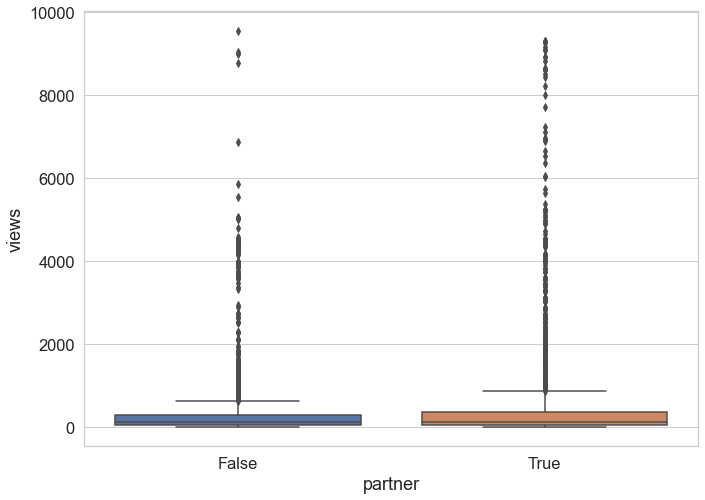

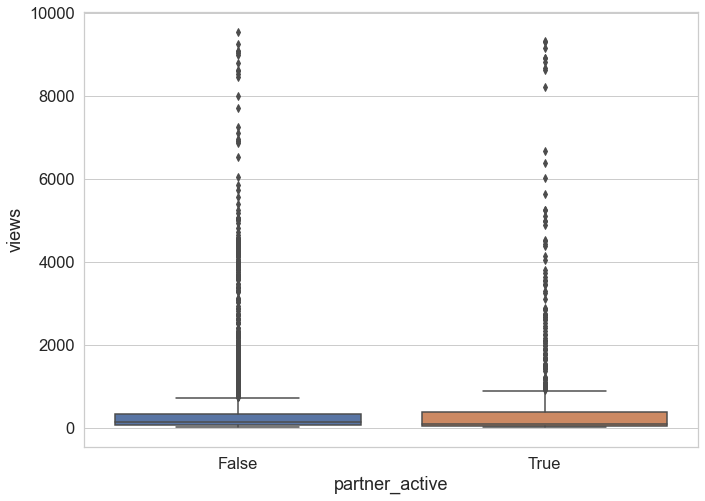

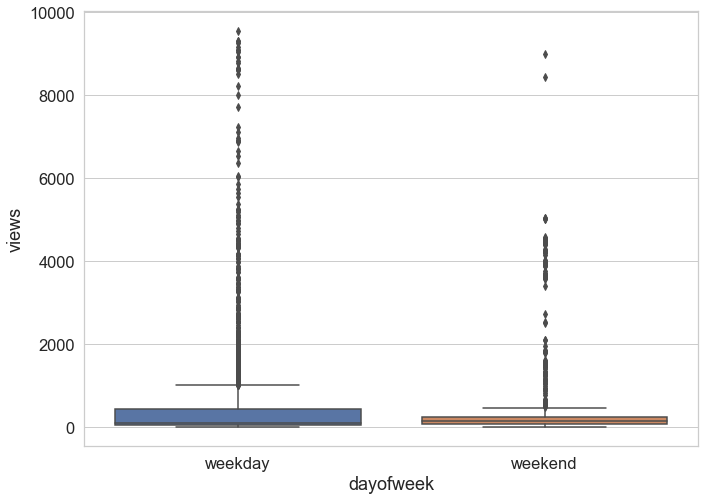

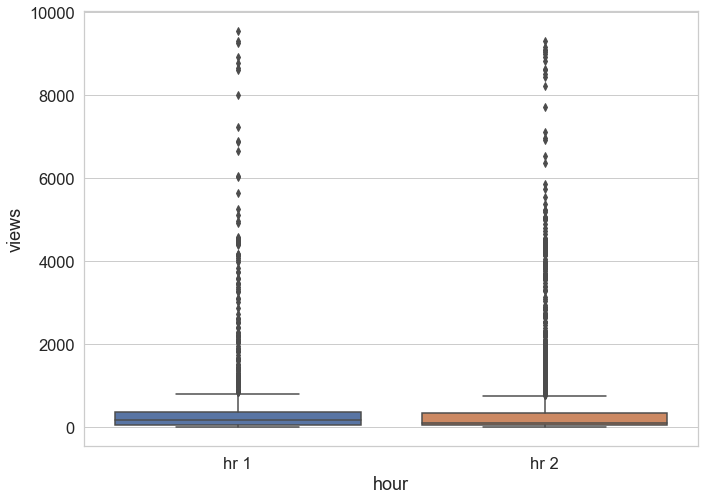

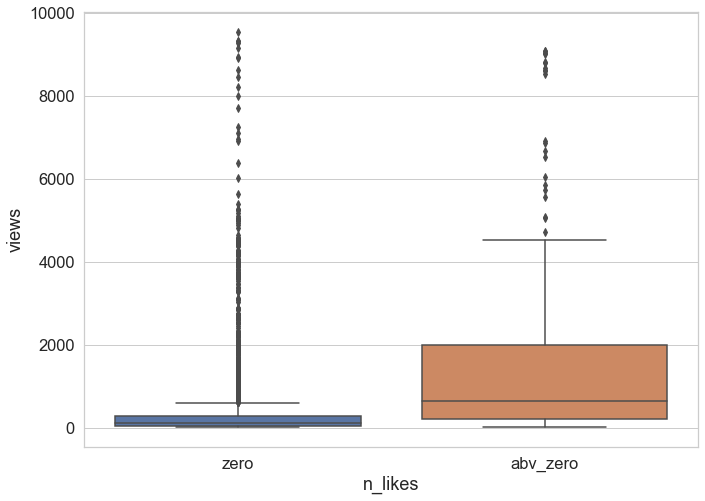

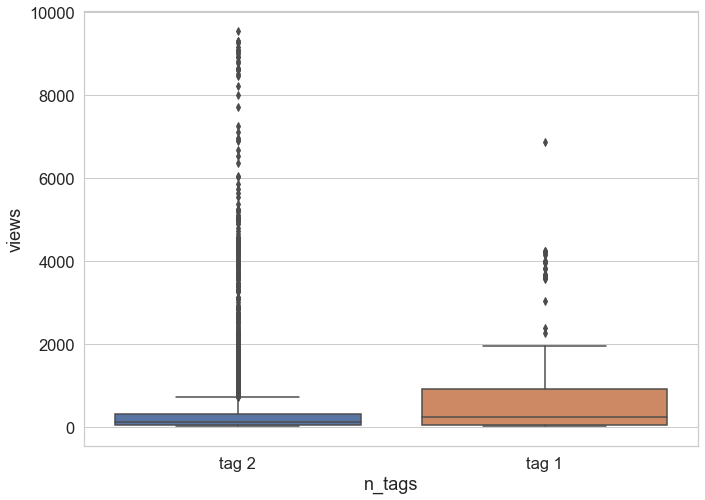

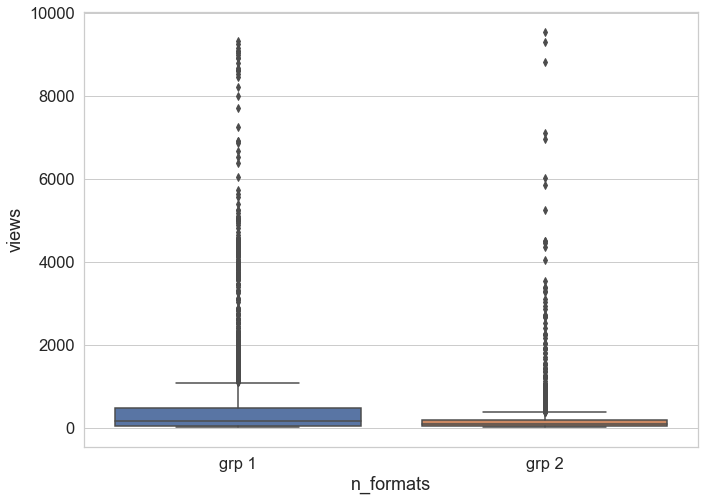

In [24]:
# relationship between categorical columns and the label
box_plot(X, cat_cols, 'views')

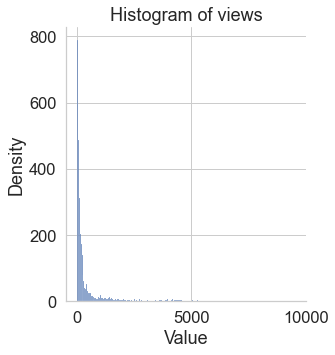

In [25]:
# histogram of the label(views)
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.displot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    

hist_plot(train['views'], 'views')

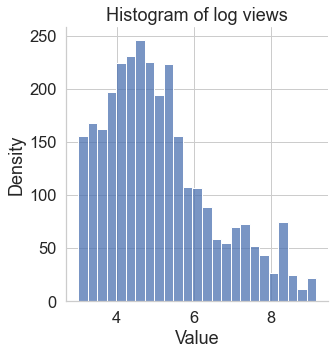

In [26]:
# transforming the views by using logarithm
train['log_views'] = np.log(train['views'])
# visualizing the distribution of log views
hist_plot(train['log_views'], 'log views')

In [27]:
# Linear regression
# loading packages
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

In [28]:
# preparing the model matrix for train dataset
# creating dummy variables from categorical variables
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

cat_features = ['language', 'dayofweek', 'hour',
                'n_likes', 'n_tags', 'n_formats']

Features = encode_string(X['embed'])
print(Features.shape)
for col in cat_features:
    temp = encode_string(X[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(3000, 2)
(3000, 15)
[[0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.]]


In [29]:
# adding numerical variables for the train dataset
num_features = X[num_cols]
Features = np.concatenate([Features, np.array(num_features)], axis = 1)
print(Features.shape)
Features[:2,:]

(3000, 17)


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.77778e+00, 8.60000e+01],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.33333e+00, 1.12900e+03]])

In [30]:
# creating a numpy array of label values
label = np.array(train['log_views'])
label

array([5.66988092, 7.27447956, 5.79605775, ..., 4.57471098, 4.34380542,
       4.07753744])

In [31]:
# defining the test dataset
X_test = df.loc['y'].copy()
X_test.head()

,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,False,True,1.33333,1675,grp 1,False,False,zero,NaN,tag 2,grp 1,weekday,hr 2
1,False,True,1.33333,1479,grp 1,False,False,zero,NaN,tag 2,grp 1,weekday,hr 2
2,False,True,1.33333,1505,grp 1,False,False,zero,NaN,tag 2,grp 1,weekday,hr 2
3,False,True,1.77778,50,grp 1,True,True,abv_zero,NaN,tag 1,grp 1,weekday,hr 2
4,False,True,1.33333,1543,grp 1,False,False,zero,NaN,tag 1,grp 1,weekday,hr 2


In [32]:
# creating numpy feature array/model matrix for test dataset
# encoding categorical variables as binary dummy variables
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()


tFeatures = encode_string(X_test['embed'])
print(tFeatures.shape)
for col in cat_features:
    temp = encode_string(X_test[col])
    tFeatures = np.concatenate([tFeatures, temp], axis = 1)

print(tFeatures.shape)
print(tFeatures[:2, :]) 

(986, 2)
(986, 15)
[[0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.]]


In [33]:
# adding the numeric features for the test dataset
num_tfeatures = X_test[num_cols]
tFeatures = np.concatenate([tFeatures, np.array(num_tfeatures)], axis = 1)
print(tFeatures.shape)
tFeatures[:2,:]

(986, 17)


array([[0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.33333e+00, 1.67500e+03],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.33333e+00, 1.47900e+03]])

In [35]:
# rescaling numric features
scaler = preprocessing.StandardScaler().fit(Features[:,15:])
Features[:,15:] = scaler.transform(Features[:,15:])
tFeatures[:,15:] = scaler.transform(tFeatures[:,15:])
print(Features.shape)
print(Features[:2,])
print(tFeatures.shape)
tFeatures[:2,]

(3000, 17)
[[ 0.          1.          0.          0.          1.          1.
   0.          1.          0.          0.          1.          0.
   1.          1.          0.          0.41242468 -0.45812491]
 [ 0.          1.          1.          0.          0.          1.
   0.          1.          0.          0.          1.          0.
   1.          1.          0.         -1.03139901  0.58126146]]
(986, 17)


array([[ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        -1.03139901,  1.12536977],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        -1.03139901,  0.93004884]])

In [36]:
# creating linear model
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(Features, label)

LinearRegression(fit_intercept=False)

In [37]:
# examining value of intercept and coefficients
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.59742745e+12  3.59742745e+12  1.73485513e+12  1.73485513e+12
  1.73485513e+12 -3.21004831e+12 -3.21004831e+12 -3.50282962e+12
 -3.50282962e+12  1.34032982e+13  1.34032982e+13  1.60607708e+13
  1.60607708e+13 -2.80834737e+13 -2.80834737e+13  2.05688477e-02
  1.08642578e-02]


In [42]:
# evaluating model
y_score = lin_mod.predict(tFeatures)
y_score[:20,]

array([4.921875  , 4.921875  , 4.921875  , 6.59692383, 5.03320312,
       4.93359375, 4.921875  , 4.921875  , 5.03125   , 4.74804688,
       4.20776367, 4.91796875, 4.93359375, 4.91796875, 4.921875  ,
       4.93359375, 4.93359375, 4.921875  , 4.921875  , 4.63378906])

In [43]:
# converting from log sale price to sale price
y_score = np.exp(y_score)
y_score[:20,]

array([137.25973406, 137.25973406, 137.25973406, 732.83738457,
       153.42366164, 138.87770837, 137.25973406, 137.25973406,
       153.12429849, 115.35875429,  67.20607679, 136.72460907,
       138.87770837, 136.72460907, 137.25973406, 138.87770837,
       138.87770837, 137.25973406, 137.25973406, 102.90323313])

In [40]:
# creating dataframe of the scores
scores_df = pd.DataFrame(y_score)
scores_df.columns = ['views']
scores_df.head()

,views
0,137.259734
1,137.259734
2,137.259734
3,732.837385
4,153.423662


In [44]:
# joining video id and scores
vid_popularity = pd.concat([test[['comp_id']], scores_df], axis=1)
vid_popularity.head()

,comp_id,views
0,3001,137.259734
1,3002,137.259734
2,3003,137.259734
3,3004,732.837385
4,3005,153.423662


In [45]:
# converting to csv file

vid_popularity.to_csv('vid_popularity4.csv')